In [1]:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from sklearn.metrics import brier_score_loss
import os
import time
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from joblib import dump, load
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve

In [2]:

# year_list = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'] #'2004','2005','2006','2007',
# x_axis = np.arange(2004,2016) #2004-2014
# model_path = 'log_without_norm_models/2004_logistic.joblib'
# feature_data_path = 'without_norm_datasets/test/features/'
# target_data_path = 'without_norm_datasets/test/target/'
# feature_data_path_train = 'without_norm_datasets/train/features/'
# target_data_path_train = 'without_norm_datasets/train/target/'

# every_year_list = []
# auc_train = []
# BSS_per_year = []
# DR_list = []
# BS_per_year = []
# for year in year_list:
#     feature_data_file = os.path.join(feature_data_path, '{}_log.csv'.format(year))
#     target_data_file = os.path.join(target_data_path, '{}_log.csv'.format(year))
#     feature_data_file_train = os.path.join(feature_data_path_train, '{}_log.csv'.format(year))
#     target_data_file_train = os.path.join(target_data_path_train, '{}_log.csv'.format(year))
    
#     model_this_year = load('log_without_norm_models/{}_logistic.joblib'.format(year)) 
#     X = genfromtxt(feature_data_file, delimiter=',')
#     y = genfromtxt(target_data_file, delimiter=',')
#     X_train = genfromtxt(feature_data_file_train, delimiter=',')
#     y_train = genfromtxt(target_data_file_train, delimiter=',')
    
#     viz = plot_roc_curve(model_this_year, X, y,name=''.format(0),alpha=0.5, lw=1)
#     every_year_list.append(viz.roc_auc)
#     viz_train = plot_roc_curve(model_this_year, X_train, y_train,name=''.format(0),alpha=0.5, lw=1)
#     auc_train.append(viz_train.roc_auc)
    
#     predict_prob = model_this_year.predict_proba(X)[:, 1]
#     mu = np.mean(y_train)
#     BS = brier_score_loss(y, predict_prob)
#     BS_r = mu*(1-mu)
#     BSS = (BS_r-BS)/BS_r
#     BSS_per_year.append(BSS)
    
#     DR_list.append(np.mean(y))
    
#     BS_per_year.append(BS)
    
#     print('Predict {} base every year model'.format(year))
    
#   #

# predict_results = []
# EDR_list = []
# BSS_2004_list = []
# BS_2004_list = []
# model = load(model_path) 
# for year in year_list:
#     feature_data_file = os.path.join(feature_data_path, '{}_log.csv'.format(year))
#     target_data_file = os.path.join(target_data_path, '{}_log.csv'.format(year))
#     target_data_file_train = os.path.join(target_data_path_train, '{}_log.csv'.format(year))
    
#     X = genfromtxt(feature_data_file, delimiter=',')
#     y = genfromtxt(target_data_file, delimiter=',')
#     y_train = genfromtxt(target_data_file_train, delimiter=',')
    
#     y_scores = model.decision_function(X)  
#     viz = plot_roc_curve(model, X, y,name=''.format(0),alpha=0.5, lw=1)
    
#     predict_results.append(viz.roc_auc)
    
#     predict_prob = model.predict_proba(X)[:, 1]
#     mu = np.mean(y_train)
#     BS = brier_score_loss(y, predict_prob)
#     BS_r = mu*(1-mu)
#     BSS = (BS_r-BS)/BS_r
#     BSS_2004_list.append(BSS)
    
#     EDR_list.append(np.mean(predict_prob))
    
#     BS_2004_list.append(BS)
#     print(mu)
#     print('Predict {} base 2004 model'.format(year))
    

In [3]:
  # feature_data_path = 'without_norm_datasets/test/features/'
    # target_data_path = 'without_norm_datasets/test/target/'
    # feature_data_path_train = 'without_norm_datasets/train/features/'
    # target_data_path_train = 'without_norm_datasets/train/target/'

In [4]:
def Predict_every_year_N_S(model_path):

    year_list = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'] #'2004','2005','2006','2007',
    x_axis = np.arange(2004,2016) #2004-2014

    every_year_list = []
    auc_train = []
    BSS_per_year = []
    DR_list = []
    BS_per_year = []
    
    for year in year_list:
        data_path = 'data_flag/{year}_flag.csv'.format(year=year)  
        cols = pd.read_csv(data_path).columns
        data = pd.read_csv(data_path, usecols = cols[1:]) 
        data['FIRST_TIME_HOMEBUYER_FLAG'] = data['FIRST_TIME_HOMEBUYER_FLAG'].apply(lambda x : np.NaN if x == '9' else x)
        data['NUMBER_OF_UNITS'] = data['NUMBER_OF_UNITS'].apply(lambda x : np.NaN if x == 99 else x)
        data['CHANNEL'] = data['CHANNEL'].apply(lambda x : np.NaN if x == 'T' else x)
        data['PROPERTY_TYPE'] = data['PROPERTY_TYPE'].apply(lambda x : np.NaN if x == '99' else x)
        data['NUMBER_OF_BORROWERS'] = data['NUMBER_OF_BORROWERS'].apply(lambda x : np.NaN if x == 99 else x)


        output_array = np.asarray(data['default_flag'].astype(int))
        input_array = np.c_[
            data[['CREDIT_SCORE',#0
                  'ORIGINAL_DTI_RATIO',#1
                  'ORIGINAL_UPB',#2
                  'ORIGINAL_LTV',#3
                  'ORIGINAL_LOAN_TERM',#4
                  'ORIGINAL_INTEREST_RATE'#5
                 ]],
            np.asarray(pd.get_dummies(data['FIRST_TIME_HOMEBUYER_FLAG'])), # N,Y,9 str remove 9
            np.asarray(pd.get_dummies(data['NUMBER_OF_UNITS'])), # 1 2 3 4 99 int remove 99
            np.asarray(pd.get_dummies(data['OCCUPANCY_STATUS'])), # P S I str
            np.asarray(pd.get_dummies(data['CHANNEL'])), # T R C B str remove T
            np.asarray(pd.get_dummies(data['PROPERTY_TYPE'])), # SF PU CO MH CP 99 str remove 99
            np.asarray(pd.get_dummies(data['LOAN_PURPOSE'])), # P N C str
            np.asarray(pd.get_dummies(data['NUMBER_OF_BORROWERS'])) # 2 1 99 int remove 99
        ]


        X = input_array 
        y = output_array

        X_train, X, y_train, y = train_test_split(
            X, y, 
            test_size=0.3, 
            stratify = y,
            random_state=13
        )

        model_this_year = load(model_path.format(year)) 

        viz = plot_roc_curve(model_this_year, X, y,name=''.format(0),alpha=0.5, lw=1)
        every_year_list.append(viz.roc_auc)

        viz_train = plot_roc_curve(model_this_year, X_train, y_train,name=''.format(0),alpha=0.5, lw=1)
        auc_train.append(viz_train.roc_auc)

        predict_prob = model_this_year.predict_proba(X)[:, 1]
        mu = np.mean(y_train)
        BS = brier_score_loss(y, predict_prob)
        BS_r = mu*(1-mu)
        BSS = (BS_r-BS)/BS_r
        BSS_per_year.append(BSS)

        DR_list.append(np.mean(y))

        BS_per_year.append(BS)

        print('Predict {} base every year model'.format(year))

    return every_year_list, auc_train, BSS_per_year, DR_list, BS_per_year    

In [5]:
def Predict_every_year_S(model_path):
    year_list = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'] #'2004','2005','2006','2007',
    x_axis = np.arange(2004,2016) #2004-2014
    X_path = 'data_train/{year}/input.csv'
    y_path = 'data_train/{year}/output.csv'

    every_year_list = []
    auc_train = []
    BSS_per_year = []
    DR_list = []
    BS_per_year = []
    
    for year_ in year_list:
        cols = pd.read_csv(X_path.format(year=year_)).columns
        X = pd.read_csv(X_path.format(year=year_), usecols = cols[1:])
        cols = pd.read_csv(y_path.format(year=year_)).columns
        y = pd.read_csv(y_path.format(year=year_), usecols = cols[1:]) 
        X = X.to_numpy()
        y = np.asarray(y['0'].astype(int))

        X_train, X, y_train, y = train_test_split(
            X, y, 
            test_size=0.3, 
            stratify = y,
            random_state=13
        )

        model_this_year = load(model_path.format(year_)) 

        viz = plot_roc_curve(model_this_year, X, y,name=''.format(0),alpha=0.5, lw=1)
        every_year_list.append(viz.roc_auc)

        viz_train = plot_roc_curve(model_this_year, X_train, y_train,name=''.format(0),alpha=0.5, lw=1)
        auc_train.append(viz_train.roc_auc)

        predict_prob = model_this_year.predict_proba(X)[:, 1]
        mu = np.mean(y_train)
        BS = brier_score_loss(y, predict_prob)
        BS_r = mu*(1-mu)
        BSS = (BS_r-BS)/BS_r
        BSS_per_year.append(BSS)

        DR_list.append(np.mean(y))

        BS_per_year.append(BS)

        print('Predict {} base every year model'.format(year_))

    return every_year_list, auc_train, BSS_per_year, DR_list, BS_per_year

In [6]:
def Predict_2004_N_S(model_2004):
    year_list = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'] #'2004','2005','2006','2007',
    
    predict_results = []
    EDR_list = []
    BSS_2004_list = []
    BS_2004_list = []
    model = load(model_2004) 
    
    for year in year_list:

        data_path = 'data_flag/{year}_flag.csv'.format(year=year)  
        cols = pd.read_csv(data_path).columns
        data = pd.read_csv(data_path, usecols = cols[1:]) 
        #Get dummy value
        data['FIRST_TIME_HOMEBUYER_FLAG'] = data['FIRST_TIME_HOMEBUYER_FLAG'].apply(lambda x : np.NaN if x == '9' else x)
        data['NUMBER_OF_UNITS'] = data['NUMBER_OF_UNITS'].apply(lambda x : np.NaN if x == 99 else x)
        data['CHANNEL'] = data['CHANNEL'].apply(lambda x : np.NaN if x == 'T' else x)
        data['PROPERTY_TYPE'] = data['PROPERTY_TYPE'].apply(lambda x : np.NaN if x == '99' else x)
        data['NUMBER_OF_BORROWERS'] = data['NUMBER_OF_BORROWERS'].apply(lambda x : np.NaN if x == 99 else x)

        output_array = np.asarray(data['default_flag'].astype(int))
        input_array = np.c_[
            data[['CREDIT_SCORE',#0
                  'ORIGINAL_DTI_RATIO',#1
                  'ORIGINAL_UPB',#2
                  'ORIGINAL_LTV',#3
                  'ORIGINAL_LOAN_TERM',#4
                  'ORIGINAL_INTEREST_RATE'#5
                 ]],
            np.asarray(pd.get_dummies(data['FIRST_TIME_HOMEBUYER_FLAG'])), # N,Y,9 str remove 9
            np.asarray(pd.get_dummies(data['NUMBER_OF_UNITS'])), # 1 2 3 4 99 int remove 99
            np.asarray(pd.get_dummies(data['OCCUPANCY_STATUS'])), # P S I str
            np.asarray(pd.get_dummies(data['CHANNEL'])), # T R C B str remove T
            np.asarray(pd.get_dummies(data['PROPERTY_TYPE'])), # SF PU CO MH CP 99 str remove 99
            np.asarray(pd.get_dummies(data['LOAN_PURPOSE'])), # P N C str
            np.asarray(pd.get_dummies(data['NUMBER_OF_BORROWERS'])) # 2 1 99 int remove 99
        ]

        X = input_array 
        y = output_array
        
        X_train, X, y_train, y = train_test_split(
            X, y, 
            test_size=0.3, 
            stratify = y,
            random_state=13
        )

        viz = plot_roc_curve(model, X, y,name=''.format(0),alpha=0.5, lw=1)
        predict_results.append(viz.roc_auc)

        predict_prob = model.predict_proba(X)[:, 1]
        mu = np.mean(y)
        BS = brier_score_loss(y, predict_prob)
        BS_r = mu*(1-mu)
        BSS = (BS_r-BS)/BS_r
        BSS_2004_list.append(BSS)

        EDR_list.append(np.mean(predict_prob))

        BS_2004_list.append(BS)
        print(mu)
        print('Predict {} base 2004 model'.format(year))
        
    return predict_results, EDR_list, BSS_2004_list, BS_2004_list

In [7]:
def Predict_2004_S(model_2004):
    year_list = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'] #'2004','2005','2006','2007',
    X_path = 'data_train/{year}/input.csv'
    y_path = 'data_train/{year}/output.csv'
    predict_results = []
    EDR_list = []
    BSS_2004_list = []
    BS_2004_list = []
    model = load(model_2004) 
    
    for year_ in year_list:
        cols = pd.read_csv(X_path.format(year=year_)).columns
        X = pd.read_csv(X_path.format(year=year_), usecols = cols[1:])
        cols = pd.read_csv(y_path.format(year=year_)).columns
        y = pd.read_csv(y_path.format(year=year_), usecols = cols[1:]) 
        X = X.to_numpy()
        y = np.asarray(y['0'].astype(int))

        X_train, X, y_train, y = train_test_split(
            X, y, 
            test_size=0.3,
            stratify = y,
            random_state=13
        )

        viz = plot_roc_curve(model, X, y,name=''.format(0),alpha=0.5, lw=1)
        predict_results.append(viz.roc_auc)

        predict_prob = model.predict_proba(X)[:, 1]
        mu = np.mean(y)
        BS = brier_score_loss(y, predict_prob)
        BS_r = mu*(1-mu)
        BSS = (BS_r-BS)/BS_r
        BSS_2004_list.append(BSS)

        EDR_list.append(np.mean(predict_prob))

        BS_2004_list.append(BS)
        print(mu)
        print('Predict {} base 2004 model'.format(year_))
        
    return predict_results, EDR_list, BSS_2004_list, BS_2004_list

In [8]:
def regular_plot(every_year_list, auc_train, BSS_per_year, DR_list, BS_per_year, predict_results, EDR_list, BSS_2004_list, BS_2004_list, fig_path):

    # Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
    x_axis = np.arange(2004,2016)
    fig1, ax1 = plt.subplots()  # Create a figure and an axes.

    
    ax1.plot(x_axis, DR_list, label='DR' ,marker='o')  # Plot some data on the axes.
    ax1.plot(x_axis, EDR_list, label='2004 model EDR' ,marker='x')  # Plot more data on the axes...
    ax1.set_xlabel('year')  # Add an x-label to the axes.
    ax1.set_ylabel('DR')  # Add a y-label to the axes.
    ax1.set_title("DR\EDR")  # Add a title to the axes.
    ax1.legend()  # Add a legend.

    fig2, ax2 = plt.subplots()

    ax2.plot(x_axis, BSS_per_year, label='BSS every year' ,marker='o')  # Plot some data on the axes.
    ax2.plot(x_axis, BSS_2004_list, label='BSS of 2004 model' ,marker='x')  # Plot more data on the axes...
    ax2.set_xlabel('year')  # Add an x-label to the axes.
    ax2.set_ylabel('BSS')  # Add a y-label to the axes.
    ax2.set_title("BSS")  # Add a title to the axes.
    ax2.legend()  # Add a legend.

    fig3, ax3 = plt.subplots()

    
    ax3.plot(x_axis, BS_per_year, label='BS every year' ,marker='o')  # Plot some data on the axes.
    ax3.plot(x_axis, BS_2004_list, label='BS of 2004 model' ,marker='x')  # Plot more data on the axes...
    ax3.set_xlabel('year')  # Add an x-label to the axes.
    ax3.set_ylabel('BS')  # Add a y-label to the axes.
    ax3.set_title("BS")  # Add a title to the axes.
    ax3.legend()  # Add a legend.

    fig4, ax4 = plt.subplots()

    plt.ylim((0.6,0.90))
    ax4.plot(x_axis, every_year_list, label='AUC of each year model', marker='o')  # Plot some data on the axes.
    ax4.plot(x_axis, predict_results, label='AUC of 2004 model' ,marker='x')  # Plot more data on the axes...
    ax4.plot(x_axis, auc_train, label='AUC of train set' ,marker='^')  # Plot more data on the axes...
    ax4.set_xlabel('year')  # Add an x-label to the axes.
    ax4.set_ylabel('AUC')  # Add a y-label to the axes.
    ax4.set_title("AUC compare")  # Add a title to the axes.
    ax4.legend()  # Add a legend.


    fig1.savefig(fig_path+'DR.jpg')
    fig2.savefig(fig_path+'BSS.jpg')
    fig3.savefig(fig_path+'BS.jpg')
    fig4.savefig(fig_path+'AUC_compare.jpg')
    
    a_e = np.array(every_year_list)
    a_t = np.array(auc_train)
    dif_ = (a_t - a_e).tolist()

    fig5, ax5 = plt.subplots()

    ax5.plot(x_axis, dif_, label='',marker='o')  # Plot difference
    ax5.set_xlabel('year')  # Add an x-label to the axes.
    ax5.set_ylabel('difference')  # Add a y-label to the axes.
    ax5.set_title("AUC difference between train set and test set")  # Add a title to the axes.

    fig5.savefig(fig_path+'AUC_train_test_difference.jpg')

    a_e = np.array(every_year_list)
    a_p = np.array(predict_results)
    dif = (a_e - a_p).tolist()

    fig6, ax6 = plt.subplots()

    ax6.plot(x_axis, dif, label='',marker='o')  # Plot difference
    ax6.set_xlabel('year')  # Add an x-label to the axes.
    ax6.set_ylabel('difference')  # Add a y-label to the axes.
    ax6.set_title("AUC difference between 2004 and ever year model")  # Add a title to the axes.

    fig6.savefig(fig_path+'AUC_difference.jpg')

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.6s finished


0.02329750162423956
Predict 2004 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   11.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.1s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   11.6s finished


0.04030226204442205
Predict 2005 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    9.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.5s finished


0.08284417054259476
Predict 2006 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.6s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.3s finished


0.11773052741879148
Predict 2007 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.8s finished


0.07625821248806612
Predict 2008 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    9.4s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   11.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    9.4s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   11.9s finished


0.011199484165431657
Predict 2009 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.6s finished


0.00709043250327654
Predict 2010 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    5.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.1s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    4.5s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    5.7s finished


0.005387837088545354
Predict 2011 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.4s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.9s finished


0.0034527190162252776
Predict 2012 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.3s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.5s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.5s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.2s finished


0.004977567693385923
Predict 2013 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    5.0s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    6.3s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    4.9s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    6.2s finished


0.009400194252569091
Predict 2014 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.5s finished


0.009349502337375585
Predict 2015 base 2004 model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.0s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    7.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    3.3s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    7.9s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   14.1s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   17.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.4s
[Parallel(

Predict 2004 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.2s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    9.7s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   12.1s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    1.0s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:   12.4s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   22.2s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   27.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.2s
[Parallel(

Predict 2005 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    9.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   16.6s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   20.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(

Predict 2006 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.9s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   16.1s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   20.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(

Predict 2007 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.5s finished
G:\Anaconda\envs\FYP\lib\site-packages\sklearn\metrics\_plot\roc_curve.py:88: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    3.6s
[Parallel(n_jobs=6)]: Done 353

Predict 2008 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.4s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    5.8s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   10.5s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   13.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:   13.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   24.5s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   30.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.5s
[Parallel(

Predict 2009 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    9.3s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   16.4s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   20.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(

Predict 2010 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    5.1s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    6.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.7s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    6.4s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   11.6s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   14.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.1s
[Parallel(

Predict 2011 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.5s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    3.7s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    8.8s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   15.9s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   20.0s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(

Predict 2012 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.8s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    9.2s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   16.3s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   20.4s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(

Predict 2013 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    2.9s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    5.3s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    6.6s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    2.8s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    6.7s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   12.1s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   15.2s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.2s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.2s
[Parallel(

Predict 2014 base every year model


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:    8.9s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.7s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    3.9s
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:    9.1s
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed:   16.4s
[Parallel(n_jobs=6)]: Done 800 out of 800 | elapsed:   20.7s finished
[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:    1.6s
[Parallel(

Predict 2015 base every year model


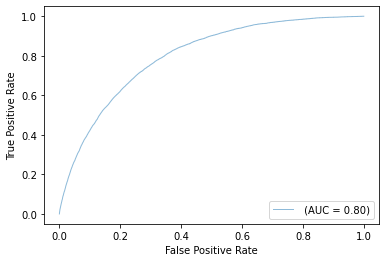

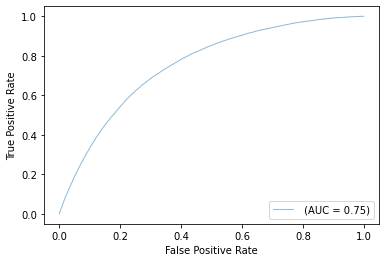

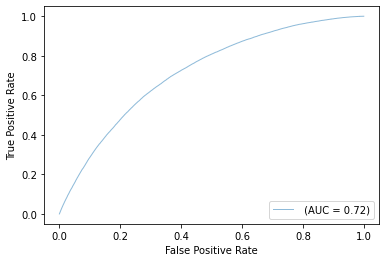

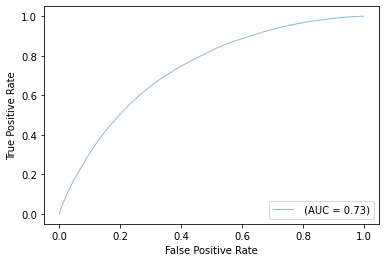

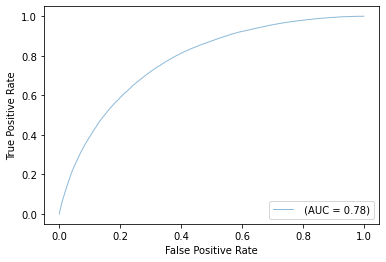

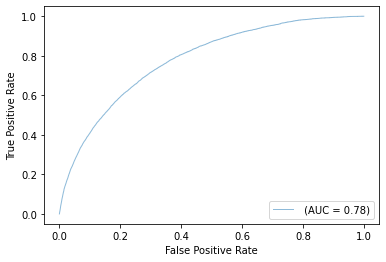

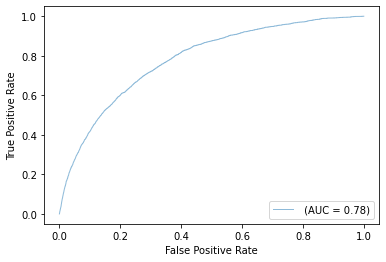

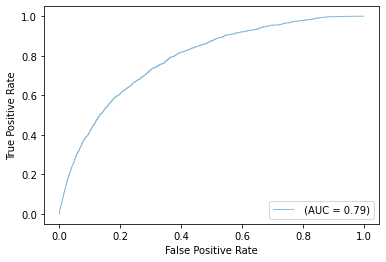

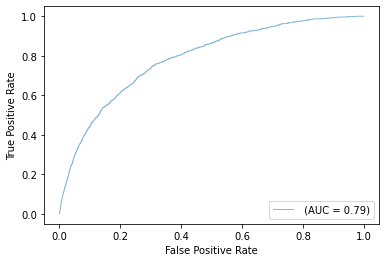

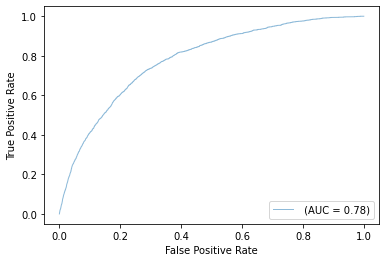

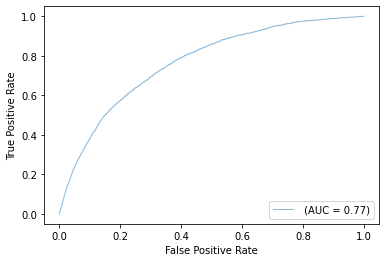

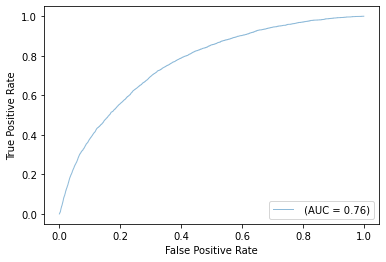

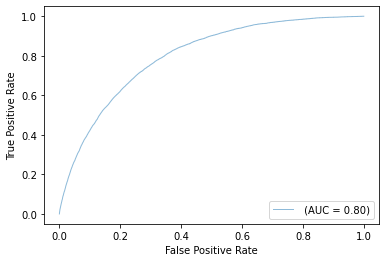

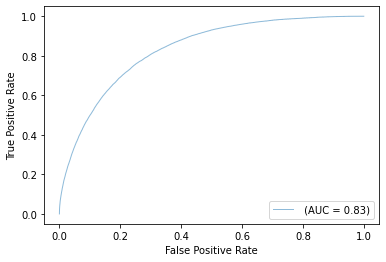

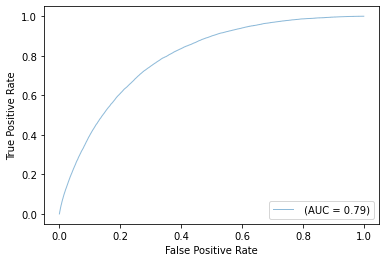

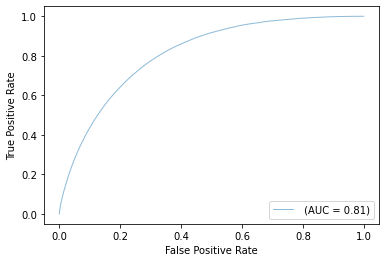

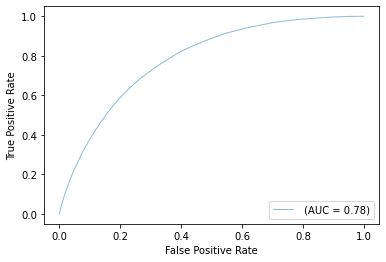

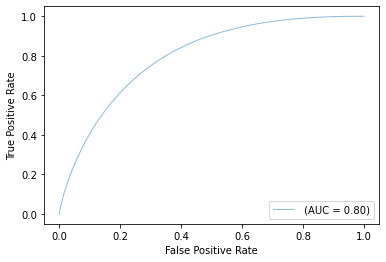

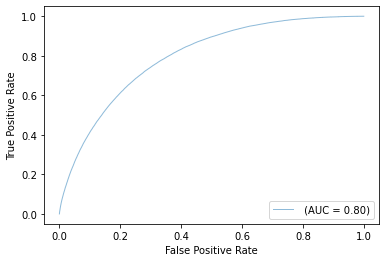

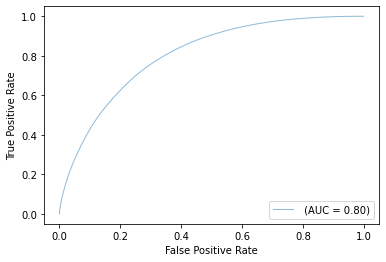

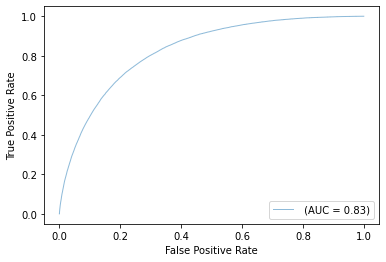

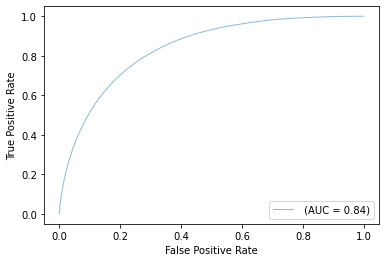

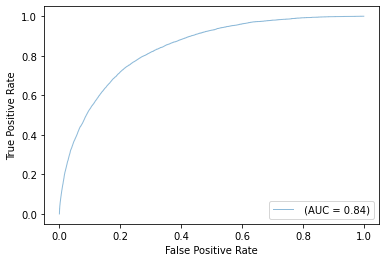

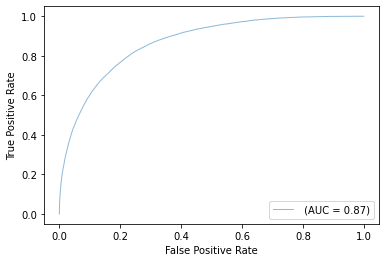

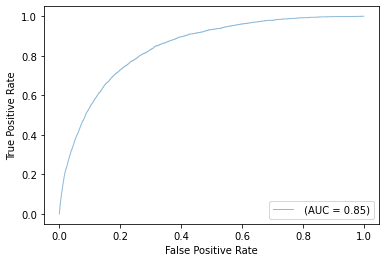

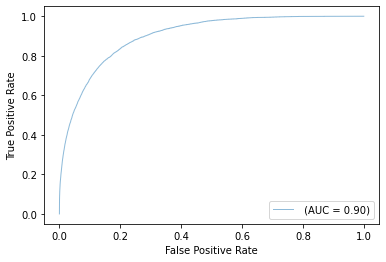

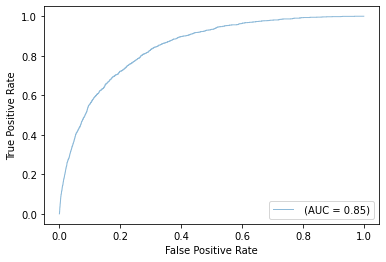

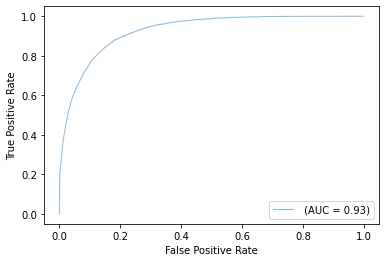

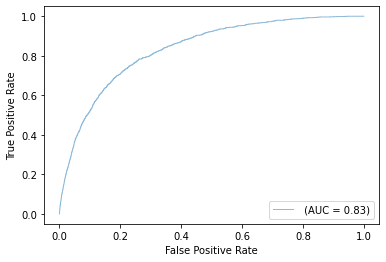

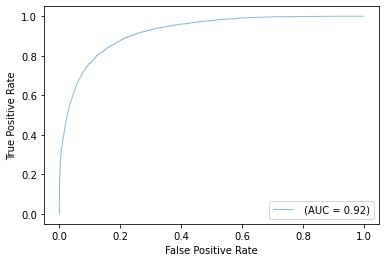

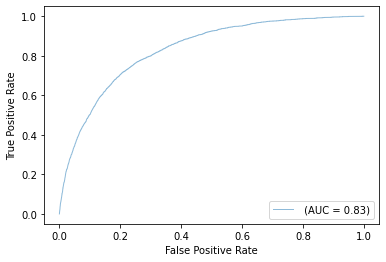

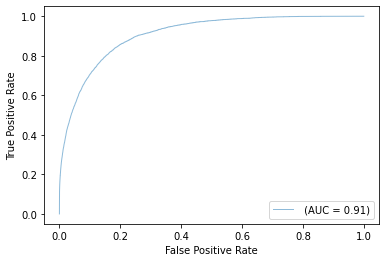

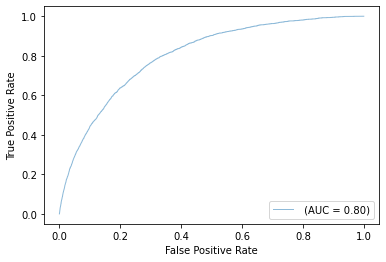

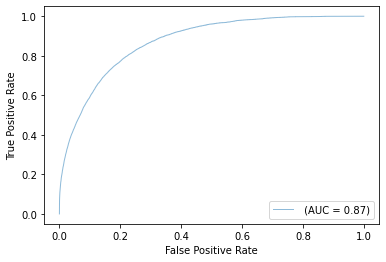

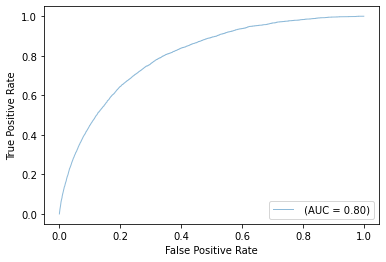

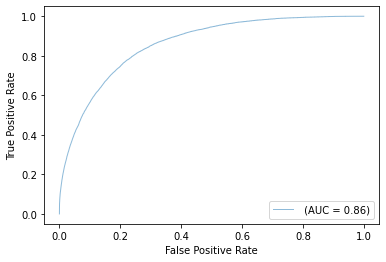

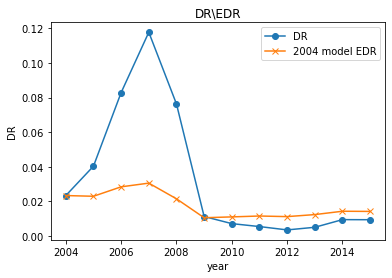

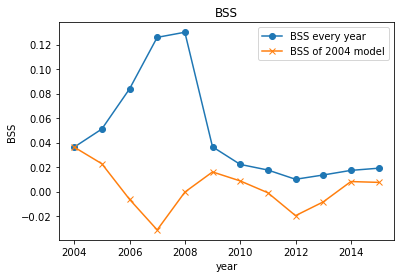

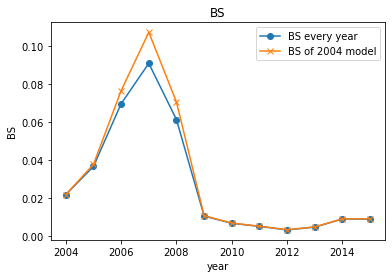

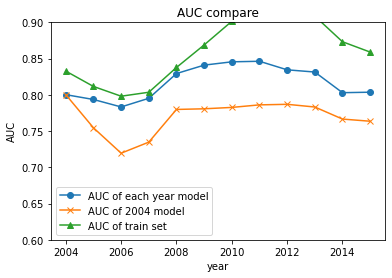

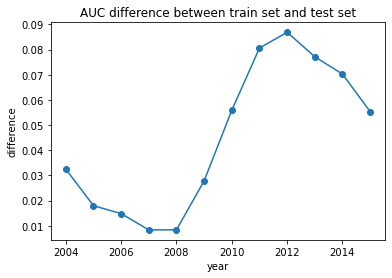

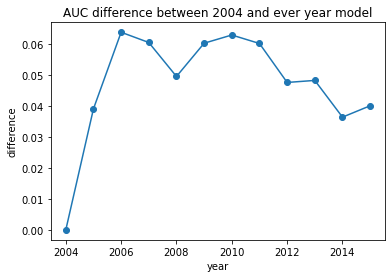

In [9]:
if __name__ == '__main__':
    mode = 'regular'
    path_list_S = [
                 './RF_models/'
                ]
    path_list_N_S = [
                ]
    
    if mode == 'regular':
        
        for path in path_list_S:
            model_2004 = path + 'models/2004.joblib'
            model_path = path + 'models/{}.joblib'
            fig_path = path
            predict_results, EDR_list, BSS_2004_list, BS_2004_list = Predict_2004_S(model_2004)
            every_year_list, auc_train, BSS_per_year, DR_list, BS_per_year = Predict_every_year_S(model_path)
            regular_plot(every_year_list, 
                         auc_train, 
                         BSS_per_year, 
                         DR_list, 
                         BS_per_year, 
                         predict_results,
                         EDR_list, 
                         BSS_2004_list, 
                         BS_2004_list, 
                         fig_path)
            
        for path in path_list_N_S:
            model_2004 = path + 'models/2004.joblib'
            model_path = path + 'models/{}.joblib'
            fig_path = path
            predict_results, EDR_list, BSS_2004_list, BS_2004_list = Predict_2004_N_S(model_2004)
            every_year_list, auc_train, BSS_per_year, DR_list, BS_per_year = Predict_every_year_N_S(model_path)
            regular_plot(every_year_list, 
                         auc_train, 
                         BSS_per_year, 
                         DR_list, 
                         BS_per_year, 
                         predict_results,
                         EDR_list, 
                         BSS_2004_list, 
                         BS_2004_list, 
                         fig_path)

    elif mode == 'compare parameter':   
        dict = {
            "0.0001":"o",
            "0.001":">",
            "0.01":"v",
            "0.1":"x"
        }
        fig, ax = plt.subplots()
        x_axis = np.arange(2004,2016)
        fig_path = './NN_experiments/alpha/2004_Compared.png'

        for val in dict:
            model_path = './NN_experiments/alpha/{a}/'.format(a=val)+'models/{}.joblib'
            model_2004 = './NN_experiments/alpha/{a}/models/2004.joblib'.format(a=val)
            #model_2004 = './NN_models_new/2004.joblib'
            predict_results, EDR_list, BSS_2004_list, BS_2004_list = Predict_2004(model_2004)
            #every_year_list, auc_train, BSS_per_year, DR_list, BS_per_year = Predict_every_year(model_path)
            ax.plot(x_axis, predict_results, label='alpha = {}'.format(val), marker=dict[val])  # Plot some data on the axes.
            #ax.plot(x_axis, every_year_list, label='C = {}'.format(val), marker=dict[val])  # Plot some data on the axes.
        #     model_2004 = './NN_models_new/2004.joblib'
        #     predict_results, EDR_list, BSS_2004_list, BS_2004_list = Predict_2004(model_2004)  
        #     ax.plot(x_axis, predict_results, label='', marker='o')
        ax.set_xlabel('year')  # Add an x-label to the axes.
        ax.set_ylabel('AUC')  # Add a y-label to the axes.
        ax.set_title("AUC results with different alpha values")  # Add a title to the axes.
        ax.legend()  # Add a legend.

        fig.savefig(fig_path)

    
    
    